<div style="background-color: lightgray; padding: 18px;">
    <h1> Learning Python | Day 22
    
</div>

### Data Visualization with Matplotlib:

- Step and Bar Plot;
- Stack Plots: Multiple Bar Plots and Horizontal Bar Plots;
- Texts;
- Piecharts;
- Boxplot;
- Histogram;

Sources:
- https://matplotlib.org/
- https://matplotlib.org/3.5.0/gallery/showcase/anatomy.html
- https://www.geeksforgeeks.org/data-visualization-with-python/
- https://medium.com/@hi-sushanta/master-matplotlib-a-step-by-step-guide-for-beginners-to-experts-e76195edff1f
- https://python.plainenglish.io/data-visualization-with-matplotlib-and-seaborn-part-1-5-c1335020f981

<div style="background-color: lightgreen; padding: 10px;">
    <h2> Introduction
</div>

In the previous part we have discussed how to make graphs with ``plt.plot()`` and ``plt.scatter()`` as well as displaying the curves of several mathematical functions. 

We also discussed the concept of ``subplot`` in Matplotlib which allows us to draw multiple figures at once. 

This part is going to be a bit more advanced as we are going to learn **step, bar, and stack plot**, followed by how to put **texts** in Matplotlib figures, creating **pie charts**, and lastly, we will also talk about **boxplots**.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

<div style="background-color: lightgreen; padding: 10px;">
    <h2> Step and Bar Plot
</div>

Matplotlib works by following Cartesian coordinate system. 

So technically speaking, the way ``plt.step()`` and ``plt.bar()`` work is similar to ``plt.plot()`` and ``plt.scatter()`` in a sense that they both require **x-y pairs** in order to display something on a figure. So, before we get into it, let’s create some x-y pairs first:

In [2]:
x = np.linspace(0, 10, 15)
y = x**2 + 2*x
print('x :', x)
print('y :', y)

x : [ 0.          0.71428571  1.42857143  2.14285714  2.85714286  3.57142857
  4.28571429  5.          5.71428571  6.42857143  7.14285714  7.85714286
  8.57142857  9.28571429 10.        ]
y : [  0.           1.93877551   4.89795918   8.87755102  13.87755102
  19.89795918  26.93877551  35.          44.08163265  54.18367347
  65.30612245  77.44897959  90.6122449  104.79591837 120.        ]


---
Next, we are going to start with ``plt.step()``. Let's try to draw **step plot** together with **standard line plot** in the same figure. 

We can see in the output that ``plt.step()`` connects two dots with vertical and horizontal lines, which I think it looks something like the visualization of **Manhattan distance**. This is in contrast to ``plt.plot()``, which connects two points with a single **straight line**, resembling the visualization of the **Euclidean distance**.

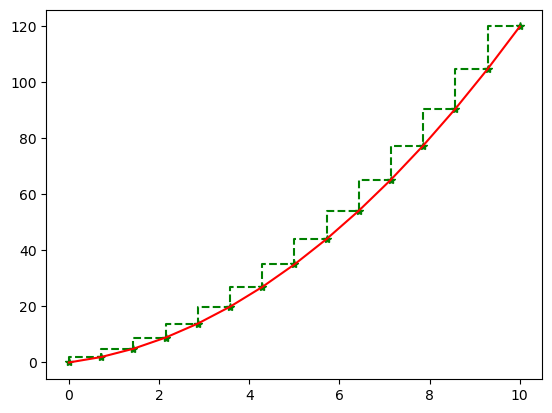

In [3]:
plt.step(x, y, 'g*--') #color: green; marker: *; linetype: --
plt.plot(x, y, 'r')    #color: red
plt.show()

---
The same data can also be displayed using bar plot ``plt.bar()``.

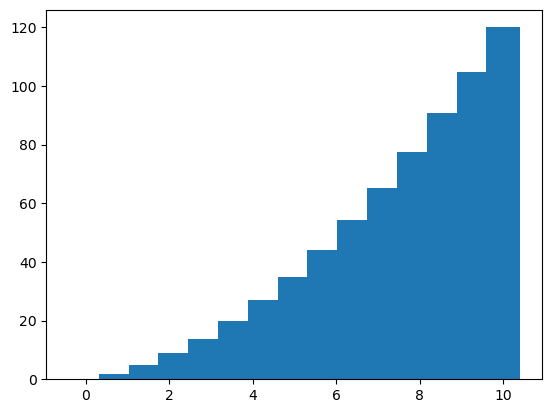

In [4]:
plt.bar(x, y)
plt.show()

---
So let's to display all graph types we’ve learned so far using subplot. 

In this case we arrange these subplots in 4 columns and 1 row, in which the leftmost subplot can be accessed through axes 0, followed by axes 1 for the next one on the right, and so forth:

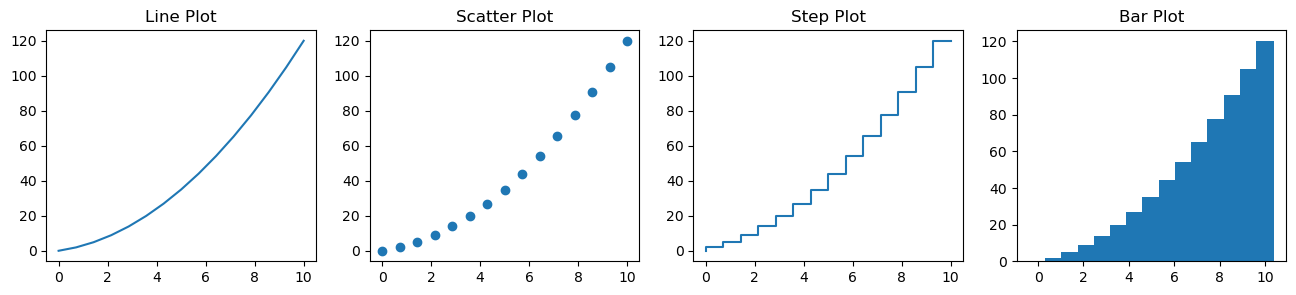

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 3))

axes[0].plot(x, y)
axes[0].set_title('Line Plot')
axes[1].scatter(x, y)
axes[1].set_title('Scatter Plot')
axes[2].step(x, y)
axes[2].set_title('Step Plot')
axes[3].bar(x, y)
axes[3].set_title('Bar Plot')

plt.show()

We can see above that basically all types of plots are possible to be used to display the same data. 

However, it’s essential to choose the most appropriate one for each specific case:
- **Line plot**: when we’re interested in displaying ``continuous data``. e.g., hourly temperature (x-axis: hour, y-axis: temperature).
- **Scatter plot**: when we want to display ``individual data points`` to understand their **relationship** between two variables. e.g., students’ math and science exam score correlation (x-axis: math score, y-axis: science score).
- **Step plot**: when we want to show data with ``discrete steps``. e.g., number of vehicles passes a junction (x-axis: hour, y-axis: vehicle count).
- **Bar plot**: when we want to show the ``frequency``, count or comparison between categories or groups. e.g., amount of expenses grouped by category (x-axis: category, y-axis: amount of money spent).

---
Let's see a full example of bar plot:

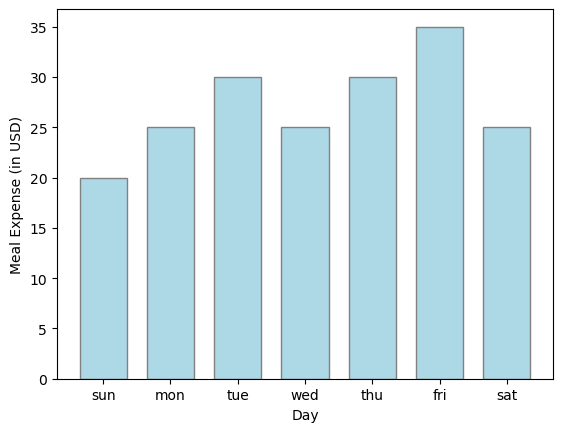

In [6]:
day = ['sun','mon','tue','wed','thu','fri','sat']
meal = [20, 25, 30, 25, 30, 35, 25]

plt.bar(day, meal, width=0.7, color='lightblue', 
        align='center', edgecolor='gray')
plt.xlabel('Day')
plt.ylabel('Meal Expense (in USD)')
plt.show()

# lately we'll see how to plot numbers and texts into the figure
# for i in range(len(day)):
#    plt.text(day[i], meal[i] + 0.5, str(meal[i]), ha='center', va='bottom')

<div style="background-color: lightgreen; padding: 10px;">
    <h2> Stack Plots
</div>

Still talking about Matplotlib’s ``bar plot``, it is actually also possible for us to stack **several bars at once** in a case where we got several expense categories within a single day. 

In the subsequent example I will create two new categories, namely travel and entertainment. <br>
All these data are going to be stored in separate arrays.

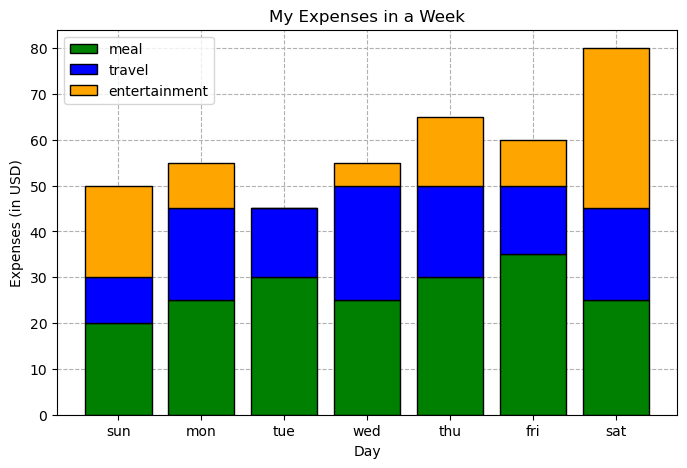

In [7]:
day = np.asarray(['sun','mon','tue','wed','thu','fri','sat'])
meal = np.asarray([20, 25, 30, 25, 30, 35, 25])
travel = np.asarray([10, 20, 15, 25, 20, 15, 20])
entertainment = np.asarray([20, 10, 0, 5, 15, 10, 35])

plt.figure(figsize=(8,5))

plt.bar(day, meal, color='green', edgecolor='black', zorder=2)    #(1)
plt.bar(day, travel, color='blue', edgecolor='black', bottom=meal, zorder=2)    #(2)
plt.bar(day, entertainment, color='orange', edgecolor='black', bottom=meal+travel, zorder=2)    #(3)

plt.legend(['meal', 'travel', 'entertainment'])
plt.grid(linestyle='--', zorder=1)    #(4)
                           
plt.title('My Expenses in a Week')
plt.xlabel('Day')
plt.ylabel('Expenses (in USD)')
plt.show()

**Tip**: *In order for the two to get stacked, we need to pass the ``meal array`` to the ``bottom`` parameter of the travel plot (#2). Next, since we want the entertainment to be placed on top of both meal and travel, hence we have to pass ``bottom=meal+travel`` (#3). In addition to the above codeblock, here I also use ``plt.grid()`` to draw gridlines. The ``zorder`` params I wrote are used to place the gridlines **underneath** the barplots. Generally speaking, a plot with larger zorder is going to be placed on top of the ones with smaller zorder.*

<div style="background-color: lightgray; padding: 10px;">
    <h2> Multiple Bar Plots
</div>

Multiple bar plot is another variation that we can use as an alternative for stacked bar plot:

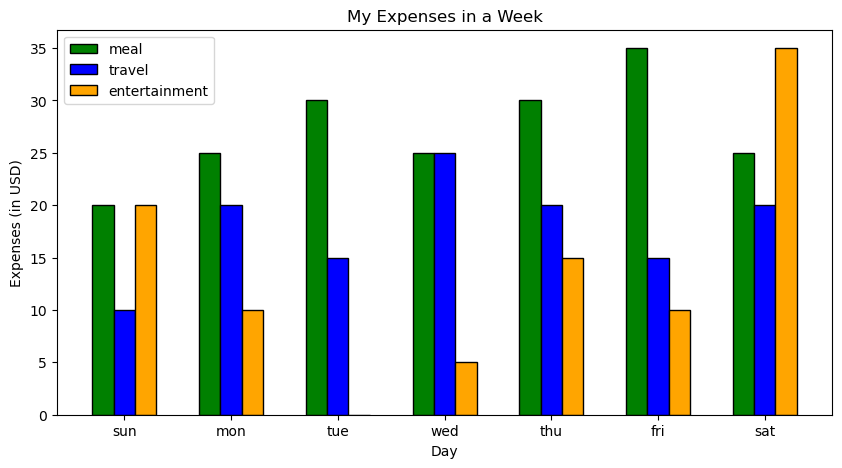

In [8]:
day_no = np.asarray([0,1,2,3,4,5,6])
w = 0.2    # Bar width adjustment value.

plt.figure(figsize=(10, 5))

plt.bar(day_no, meal, width=w, edgecolor='black', color='green')
plt.bar(day_no+w, travel, width=w, edgecolor='black', color='blue')
plt.bar(day_no+w*2, entertainment, width=w, edgecolor='black', color='orange')

plt.legend(['meal', 'travel', 'entertainment'])
plt.xticks(day_no+w, day)

plt.title('My Expenses in a Week')
plt.xlabel('Day')
plt.ylabel('Expenses (in USD)')
plt.show()

A bit different from the previous one, the ``plt.bar()`` here uses **day_no** which comprises of an integer from 0 to 6 for the x parameter (as opposed to day which contains Sunday, Monday, and so forth). 

This is basically done because we are going to use the **numbers** to shift the bar position such that one category is placed next to another. The shifting itself is done using ``w`` which is set to ``0.2``. 

The value of this variable will also determine the ``width`` of each bar. It is important to keep in mind that since we have our data stored in 3 arrays, hence the total width of these bars in a single day is going to be ``0.6``.

<div style="background-color: lightgray; padding: 10px;">
    <h2> Horizontal Bar Plot
</div>

Bar chart can also be drawn horizontally using ``plt.barh()``, which I believe the letter **h** in the name stands for **horizontal**. 

The params of this function is mostly the same as ``plt.bar()``. The only difference is the ``height`` and ``left`` which are basically equivalent to ``width`` and ``bottom`` respectively.

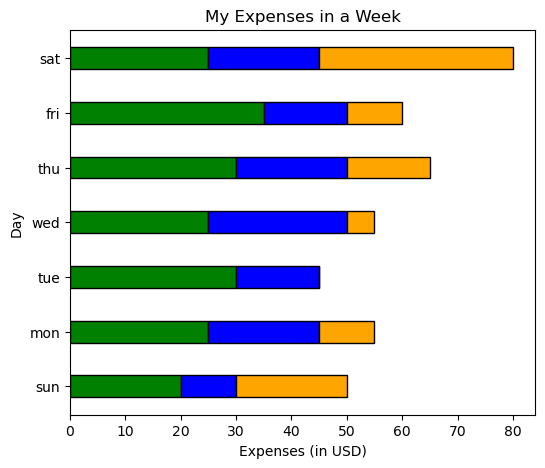

In [9]:
plt.figure(figsize=(6,5))

plt.barh(day, meal, color='green', height=0.4, edgecolor='black')
plt.barh(day, travel, color='blue', height=0.4, edgecolor='black', left=meal)
plt.barh(day, entertainment, color='orange', height=0.4, edgecolor='black', left=meal+travel)

plt.title('My Expenses in a Week')
plt.xlabel('Expenses (in USD)')
plt.ylabel('Day')
plt.show()

**Tip:** *The choice between using stacked or multiple bar plots depends on the specific information we aim to highlight in our data representation. When our primary goal is to compare categories directly, a ``multiple bar plot`` is the preferred choice. On the other hand, if we intend to emphasize both the total amount spent and the proportion allocated to each category, a ``stacked bar`` plot becomes a more suitable option.*

<div style="background-color: lightgray; padding: 10px;">
    <h2> Stack Plot (Area)
</div>

Similar to the functions we’ve discussed earlier, it accepts x and y values. What distinguishes it is its capacity to handle **multiple y-arrays** simultaneously. 

The visualization created by ``plt.stackplot()`` is similar to a stacked bar plot in a sense that one category placed on top of others, resulting in the overall height representing the sum of all categories:

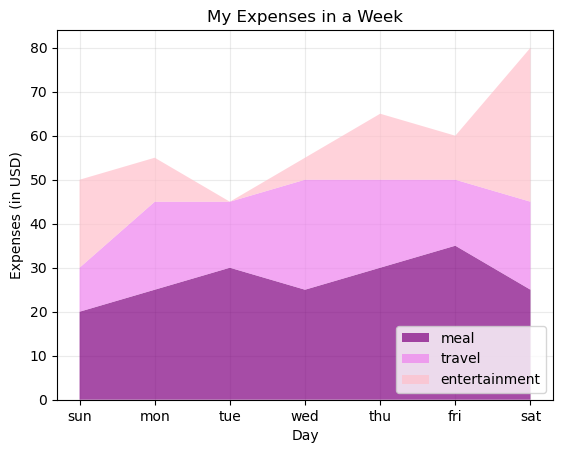

In [10]:
plt.title('My Expenses in a Week')

plt.stackplot(day, [meal, travel, entertainment], alpha=0.7, colors=['purple', 'violet', 'pink'], zorder=2)

plt.legend(['meal', 'travel', 'entertainment'], loc='lower right')

plt.grid(zorder=1, alpha=0.25)
plt.xlabel('Day')
plt.ylabel('Expenses (in USD)')
plt.show()

<div style="background-color: lightgreen; padding: 10px;">
    <h2> Texts
</div>

Matplotlib allows us to manually write some texts in a figure:

```python
syntax:
matplotlib.pyplot.text(x, y, s, fontdict=None, **kwargs)
```

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html

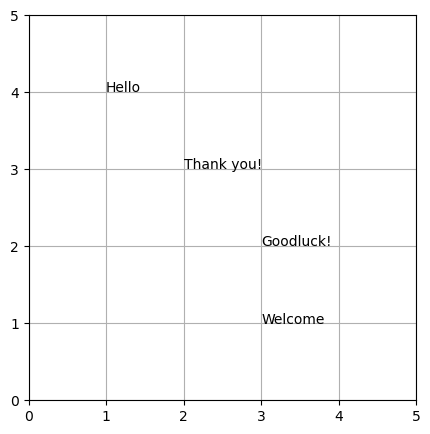

In [11]:
plt.figure(figsize=(5,5))
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.grid()

plt.text(1, 4, 'Hello')
plt.text(2, 3, 'Thank you!')
plt.text(3, 1, 'Welcome')
plt.text(3, 2, 'Goodluck!')
plt.show()

One thing that you might need to pay attention to is that the default **origin** of the string is located at the ``bottom left`` of the text. 

If you want to change this behavior, you can simply modify the argument of ``horizontalalignment`` (ha) and ``verticalalignment`` (va).

And for curiosity, if you feel like the above texts look too plain, we can actually make lots of modifications through the available parameters like ``family``, ``size``, ``color``, ``rotation``, ``weight``, and ``style``.

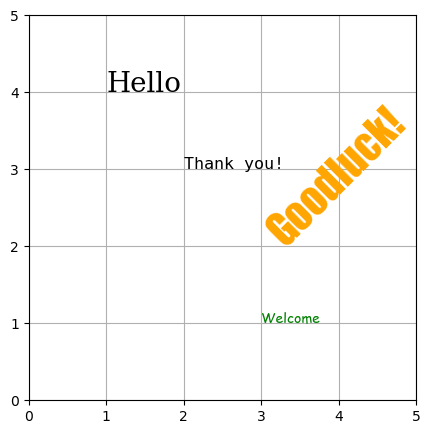

In [12]:
plt.figure(figsize=(5,5))
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.grid()

plt.text(1, 4, 'Hello', family='serif', size=20)
plt.text(2, 3, 'Thank you!', family='monospace', size=12)
plt.text(3, 1, 'Welcome', family='cursive', color='green')
plt.text(3, 2, 'Goodluck!', family='fantasy', rotation=45, size=30, color='#FFA500')
plt.show()

---
Writing texts in Matplotlib is somewhat useless if we don’t actually use it together with its graphing functionalities. 

So, what I want to do now is to draw a ``barplot`` using the data we previously used and write some texts on it:

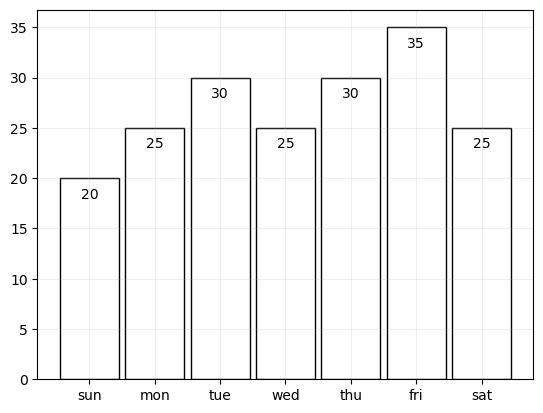

In [13]:
plt.bar(day, meal, width=0.9, color='white', edgecolor='black')  #(1)

plt.text(0, meal[0]-2, meal[0], ha='center')
plt.text(1, meal[1]-2, meal[1], ha='center')
plt.text(2, meal[2]-2, meal[2], ha='center')
plt.text(3, meal[3]-2, meal[3], ha='center')
plt.text(4, meal[4]-2, meal[4], ha='center')
plt.text(5, meal[5]-2, meal[5], ha='center')
plt.text(6, meal[6]-2, meal[6], ha='center')

plt.grid(alpha=0.2)

The above code initially works by drawing a standard bar plot using ``plt.bar()`` (#1). 

If we take a closer look at the first elements of each ``plt.text()`` function, you can see that I use the number of 0, 1, 2, all the way to 6 for the x-coordinate. Each of those numbers denotes the label “sun”, “mon”, “tue”, and so forth. This is basically done because essentially every single tick is perceived as a single coordinate unit. 

Furthermore, the value of -2 that I wrote in all lines are useful to shift the printed text a bit *downwards* so that it lies just below the top border of the bars.

**Tip:** We can actually simplify it using a for loop as follows:

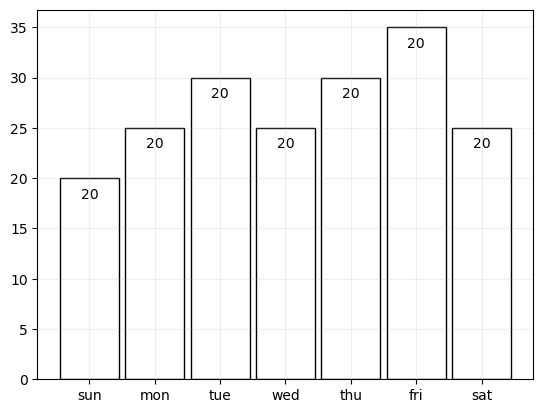

In [14]:
plt.bar(day, meal, width=0.9, color='white', edgecolor='black')

for i in range(7):
    plt.text(i, meal[i]-2, meal[0], horizontalalignment='center')

plt.grid(alpha=0.2)

<div style="background-color: lightgreen; padding: 10px;">
    <h2> Piecharts
</div>

Another function that is commonly used to visualize data is ``plt.pie()``. 

First, I would like to initialize a list to demonstrate how I create a **pie chart**. 

Let’s assume that the time list in the codeblock represents the percentage of time allocated by a person within a single day. You can verify this by summing all numbers in the list as it equals to 1, or 100%.

Next, we can just put this list to ``plt.pie()`` like this:

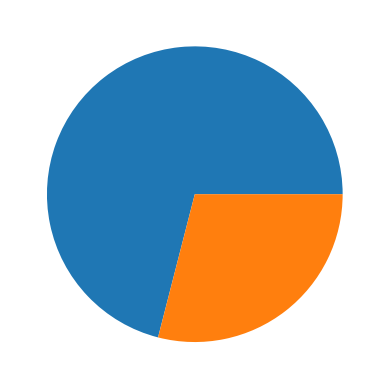

In [15]:
time = [0.71, 0.29]
activity = ['Work','Sleep']

plt.pie(time)
plt.show()

To make this pie chart look better and more informative, we need to pass some arguments like in the example below. 

In this case, we'll use ``labels``, ``colors``, ``autopct`` and ``startangle``:
- The first three arguments ``labels`` need to be in form of a list, in which each of the elements corresponds to each portion of the main data (time);
- The ``autopct='%1.1f%%’`` I wrote above indicates that we will write 1 digit after the decimal point of the percentage. If we want it to be more precise, i.e., adding more numbers after the decimal point, we can write ``'%1.2f%%'`` or even ``'%1.3f%%'``;
- The ``startangle`` parameter which is set to 90 is actually not quite important. But in case you have concerns about it, you can just choose a number somewhere between 0 and 360;

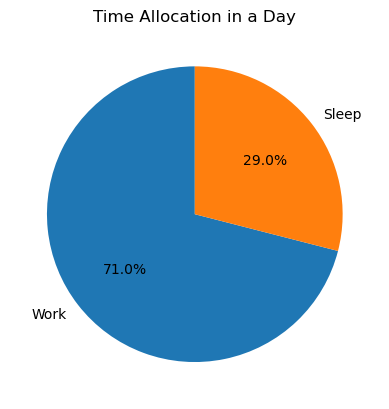

In [16]:
time = [0.71, 0.29]
activity = ['Work','Sleep']

plt.title('Time Allocation in a Day')
plt.pie(time, labels = activity , autopct='%1.1f%%', startangle=90)
plt.show()

<div style="background-color: lightgreen; padding: 10px;">
    <h2> Boxplot
</div>

The box plot is a graph used to assess the empirical distribution of data, giving us a **sense of how the data is distributed**. 

The box plot consists of the first and third quartiles and the median. The lines known as lower and upper whiskers extend, respectively, from the lower quartile to the smallest value not less than the lower limit and from the upper quartile to the largest value not greater than the upper limit. The limits are calculated as follows:

Lower limit: $ \max\{\min(\text{data});Q_1-1.5(Q_3-Q_1)\} $.

Upper limit: $ \min\{\max(\text{data});Q_3+1.5(Q_3-Q_1)\} $.

In this case, points outside these limits are considered outliers and are denoted by an asterisk (*). The following figure presents an example of the format of a box plot.

<img src=https://miro.medium.com/max/8000/1*0MPDTLn8KoLApoFvI0P2vQ.png width=500>

The box plot can also be used for visual comparison between two or more groups. For example, two or more boxes are placed side by side, and the variability between them, the median, and so on, are compared. Another important point is the difference between the quartiles $ (Q_3 - Q_1) $, which is a measure of data variability.

---
Since boxplot is effective to be used for a large dataset, hence for now we are going to load it from Scikit Learn module rather than creating it manually like we did earlier. 

In this case, we will use the famous ``Iris dataset``. 

In [17]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_data = iris['data']

print(iris_data.shape)

iris_data

(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

This dataset comprises of **150 flower samples**, each with 4 attributes:
- sepal length;
- sepal width;
- petal length;
- petal width;

In the above array, you can see that every single row represents each flower while the columns represent the attributes. Now I want to separate those attributes into four different arrays, below is the code to do so.

In [19]:
sepal_lengths = iris_data[:,0]
sepal_widths  = iris_data[:,1]
petal_lengths = iris_data[:,2]
petal_widths  = iris_data[:,3]

sepal_widths

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
       3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
       3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
       3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
       3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
       2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
       3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

---
As all flower attributes have been stored in different arrays, we can now visualize the data distribution using ``plt.boxplot()`` by specifying the array to be analyzed as the input argument:

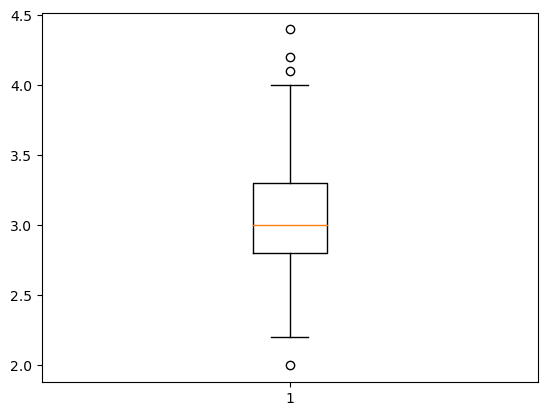

In [20]:
plt.boxplot(sepal_widths)
plt.show()

Let's apply some modifications to make it look better:

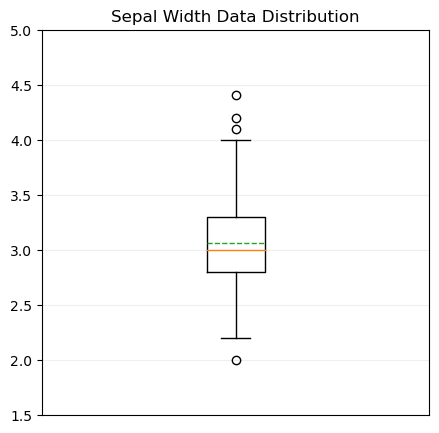

In [21]:
plt.figure(figsize=(5,5))
plt.title('Sepal Width Data Distribution')

plt.boxplot(sepal_widths, showmeans=True, meanline=True)

plt.yticks(np.arange(1.5, 5.25, 0.5))
plt.xticks([])
plt.grid(alpha=0.2)
plt.show()

Now, in this modified version we are able to see a more detailed information and thus having better understanding about the data distribution. 

There are actually several thing we can infer from the above figure:
- First, the largest and the lowest value in sepal_widths array is 4.4 and 2.0 respectively.
- Turns out, these two samples are two out of four outliers we have (note that outliers are drawn as small circles).
- In many cases, we might want to get rid of all those outliers. And if you actually do that, the maximum and the minimum value in the array is going to move to 4.0 and 2.2 (located at the upper and the lower end of the so-called whisker).
- Next, the lower end of the box (2.8) and its upper end (3.3) are called Q1 and Q3, while Q2 (i.e., median) is the orange line.

By default, box plot does not show us the position of the mean. But we can tell the function to do so by passing ``showmeans=True`` and ``meanline=True``. These two params let the ``plt.boxplot()`` to display the green line. 

To ensure that our interpretation on the above boxplot is correct, we can just print out the statistical attributes of the data distribution using the following code.

In [22]:
print('min\t\t:', min(sepal_widths))
print('max\t\t:', max(sepal_widths))
print('mean\t\t:', np.mean(sepal_widths))
print('std dev\t\t:', np.std(sepal_widths))
print('Q1\t\t:', np.quantile(sepal_widths, 0.25))
print('Q2 (median)\t:', np.median(sepal_widths))
print('Q3\t\t:', np.quantile(sepal_widths, 0.75))

min		: 2.0
max		: 4.4
mean		: 3.0573333333333337
std dev		: 0.4344109677354946
Q1		: 2.8
Q2 (median)	: 3.0
Q3		: 3.3


---
Instead of just displaying a single boxplot inside a figure, we are actually also able to show multiple boxplots at once.

In the below example, let's display the distribution of the four flower attributes in the dataset:

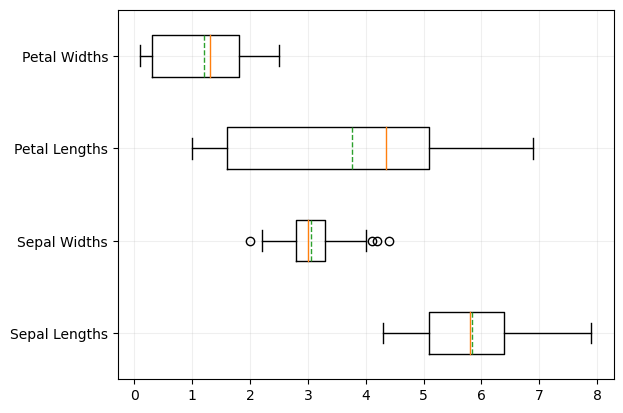

In [23]:
data = [sepal_lengths, sepal_widths, 
        petal_lengths, petal_widths]
labels = ['Sepal Lengths', 'Sepal Widths', 
          'Petal Lengths', 'Petal Widths']

plt.boxplot(data, labels=labels, vert=False, showmeans=True, meanline=True)
plt.grid(alpha=0.2)
plt.show()

<div style="background-color: lightgreen; padding: 10px;">
    <h2> Histogram
</div>

In simple terms, histogram is a graph that shows the **number of occurrences** of a particular thing in a dataset.

Let's see an example by creating 100,000 random numbers that follow the pattern of a normal distribution. 

Below, we store these random numbers in array n. Here I also print out the first 100 elements of the array:

In [24]:
n = np.random.randn(100000)

n[:100]

array([-0.2837244 , -0.87922594,  0.24815625,  0.39338318, -0.70614061,
        0.02140256, -1.75740299,  0.24120039, -0.01437568, -0.24270937,
        0.76470276, -0.60354366,  0.84511383,  0.28780059, -0.35725417,
       -0.75817875, -0.66774524, -0.07803028,  1.46604772, -1.08926553,
        1.8281302 , -0.8575233 ,  0.32995594,  2.36717942, -0.73782893,
        1.02836899, -1.04945059,  0.89371632, -2.63409136, -1.53018923,
        0.84408808, -1.26382744, -0.5102175 ,  1.5910532 ,  0.54032314,
        0.16821983, -1.1849648 ,  0.50650701, -0.4242392 , -0.51465404,
       -0.67470722,  0.0275302 , -1.27367131,  1.28720121, -1.28180234,
        1.77356676, -0.72123806, -1.64230671,  0.40740349,  0.70326727,
       -1.92192709,  1.18258848, -0.32407154, -0.19046031,  0.89689933,
        0.81199207,  1.15966547, -0.1857155 ,  0.68526769, -0.41475008,
       -0.46734094,  0.08413659, -0.57279401, -0.38575094, -0.00489985,
       -1.32877232, -0.12324745,  0.5231031 ,  0.43710564, -1.54

Next, we can visualize the distribution of n using ``plt.hist()``. 

The ``bins`` parameter which the value is set to **50** is used to determine the number of **bars** in the histogram.

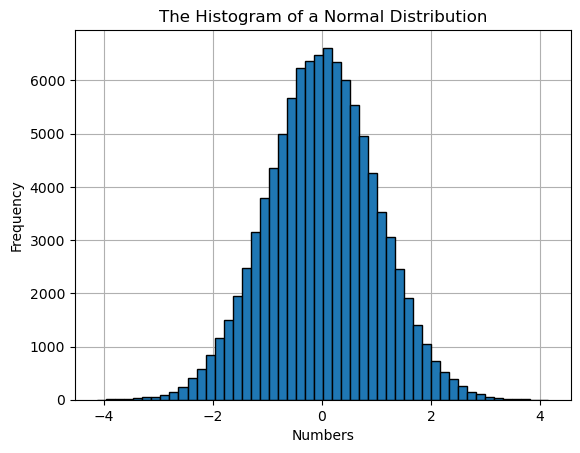

In [25]:
plt.title('The Histogram of a Normal Distribution')
plt.hist(n, bins=50, edgecolor='black', zorder=2)
plt.grid(zorder=1)

plt.xlabel('Numbers')
plt.ylabel('Frequency')

plt.show()

The figure above is an example of a **normal distribution graph**, in which the data distribution was generated using ``np.random.randn()``. 

Just a quick review, this kind of symmetrical normal distribution has a property where the **mean**, **median**, and **mode** coincide at the same point. And in this case the point is 0.